# Parcellation

Goal: Compare HCP and DK atlases

## Setup

In [1]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Import local code
import sys
sys.path.append('../code')
import pcaVersion
from processing_helpers import *
from analysis_helpers import *
from brainspan import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

Attaching package: ‘lemon’



    %||%



    CoordCartesian, element_render




In [3]:
dk_base = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=False), donors_threshold=0, DS_threshold=0, save_name='dk_base'))
dk_ds5 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=False), donors_threshold=0, DS_threshold=0.5, save_name='dk_ds5'))
dk_3donors_ds5 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=False), donors_threshold=3, DS_threshold=0.5, save_name='dk_3donors_ds5'))
dk_3donors_ds8 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=False), donors_threshold=3, DS_threshold=0.8, save_name='dk_3donors_ds8'))

dk_native_base = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=0, DS_threshold=0, save_name='dk_native_base'))
dk_native_ds5 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=0, DS_threshold=0.5, save_name='dk_native_ds5'))
dk_native_3donors_ds5 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=3, DS_threshold=0.5, save_name='dk_native_3donors_ds5'))
dk_native_3donors_ds8 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=3, DS_threshold=0.8, save_name='dk_native_3donors_ds8'))

15947 genes remain after filtering for top 1 differential stability
New PCA version
7974 genes remain after filtering for top 0.5 differential stability
New PCA version
7974 genes remain after filtering for top 0.5 differential stability
New PCA version
3190 genes remain after filtering for top 0.2 differential stability
New PCA version
15946 genes remain after filtering for top 1 differential stability
New PCA version
7973 genes remain after filtering for top 0.5 differential stability
New PCA version
7973 genes remain after filtering for top 0.5 differential stability
New PCA version
3190 genes remain after filtering for top 0.2 differential stability
New PCA version


In [8]:
data_dir = "~/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/abagen-data/expression/"
# hcp_base = pcaVersion(pd.read_csv(data_dir + 'hcp_base.csv', index_col=0))
# hcp_3donors_ds5 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds5.csv', index_col=0))
# hcp_3donors_ds6 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds6.csv', index_col=0))
# hcp_3donors_ds7 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds7.csv', index_col=0))
# hcp_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds8.csv', index_col=0))
# hcp_3donors_ds9 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds9.csv', index_col=0))

hcp_native_base = pcaVersion(pd.read_csv(data_dir + "hcp_native_base.csv", index_col=0))
hcp_native_3donors_ds5 = pcaVersion(pd.read_csv(data_dir + 'hcp_native_3donors_ds5.csv', index_col=0))
hcp_native_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'hcp_native_3donors_ds8.csv', index_col=0))

New PCA version
New PCA version
New PCA version


In [5]:
corrs_dict = {
    'Base': hcp_base.corr_coefs(dk_base),
    '3D DS5': hcp_3donors_ds5.corr_coefs(dk_3donors_ds5),
    '3D DS8': hcp_3donors_ds8.corr_coefs(dk_3donors_ds8),
}
df_corrs = (pd.concat(corrs_dict)
            .stack().reset_index()
            .set_axis(['version','x','y','corr'],axis=1)
           )

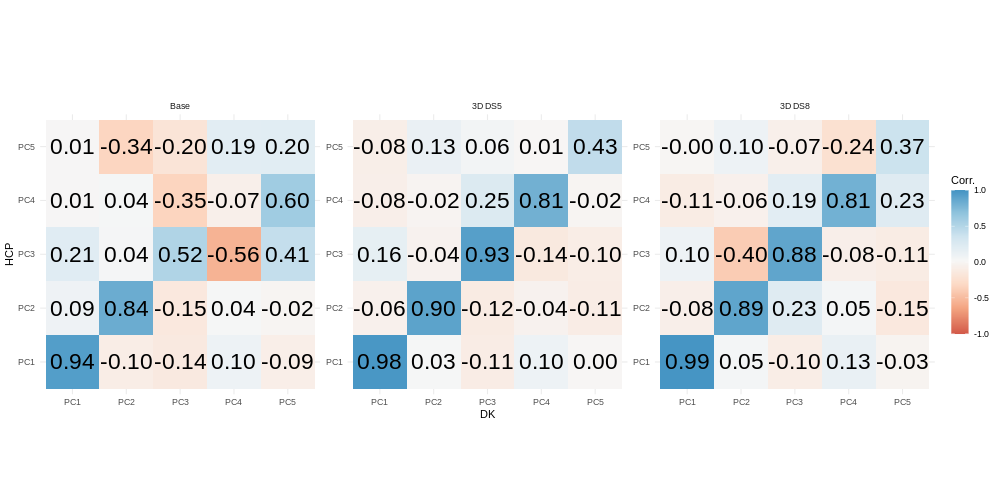

In [7]:
%%R -w 1000 -h 500 -i df_corrs
plot_corrs(df_corrs)

In [9]:
corrs_dict = {
    'Base': hcp_native_base.corr_coefs(dk_native_base),
    '3D DS5': hcp_native_3donors_ds5.corr_coefs(dk_native_3donors_ds5),
    '3D DS8': hcp_native_3donors_ds8.corr_coefs(dk_native_3donors_ds8),
}
df_corrs = (pd.concat(corrs_dict)
            .stack().reset_index()
            .set_axis(['version','x','y','corr'],axis=1)
           )

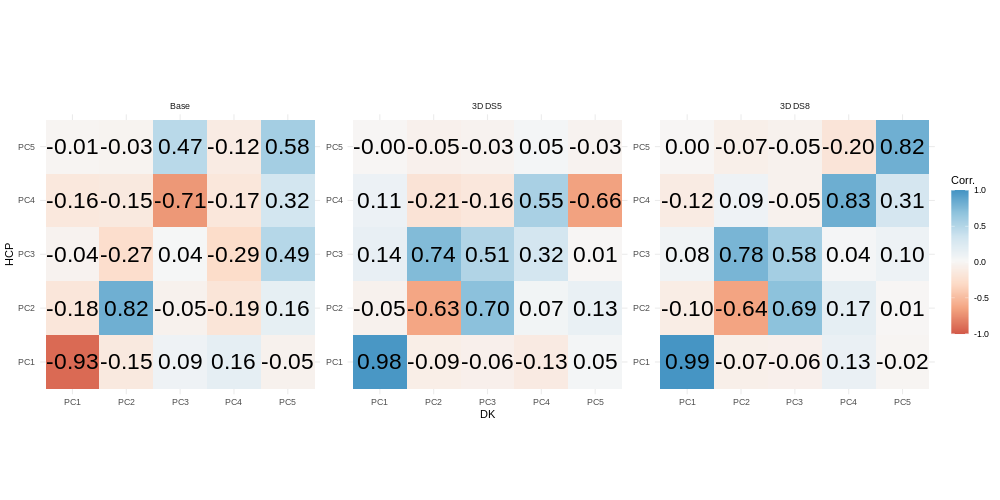

In [10]:
%%R -w 1000 -h 500 -i df_corrs
plot_corrs(df_corrs)